In [1]:
from google.colab import files
uploaded = files.upload()

Saving energy_efficiency_data.csv to energy_efficiency_data.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("energy_efficiency_data.csv")

In [4]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.describe()
# Here the surface_Area average is 671 and the SD is 88. It means that 68% of data lies near 671 +- 88. 95% of data lies near 671 +- 2*88. 99.7% of data lies near 671 +- 3*88.

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cor_mat = df.corr()
cor_mat

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


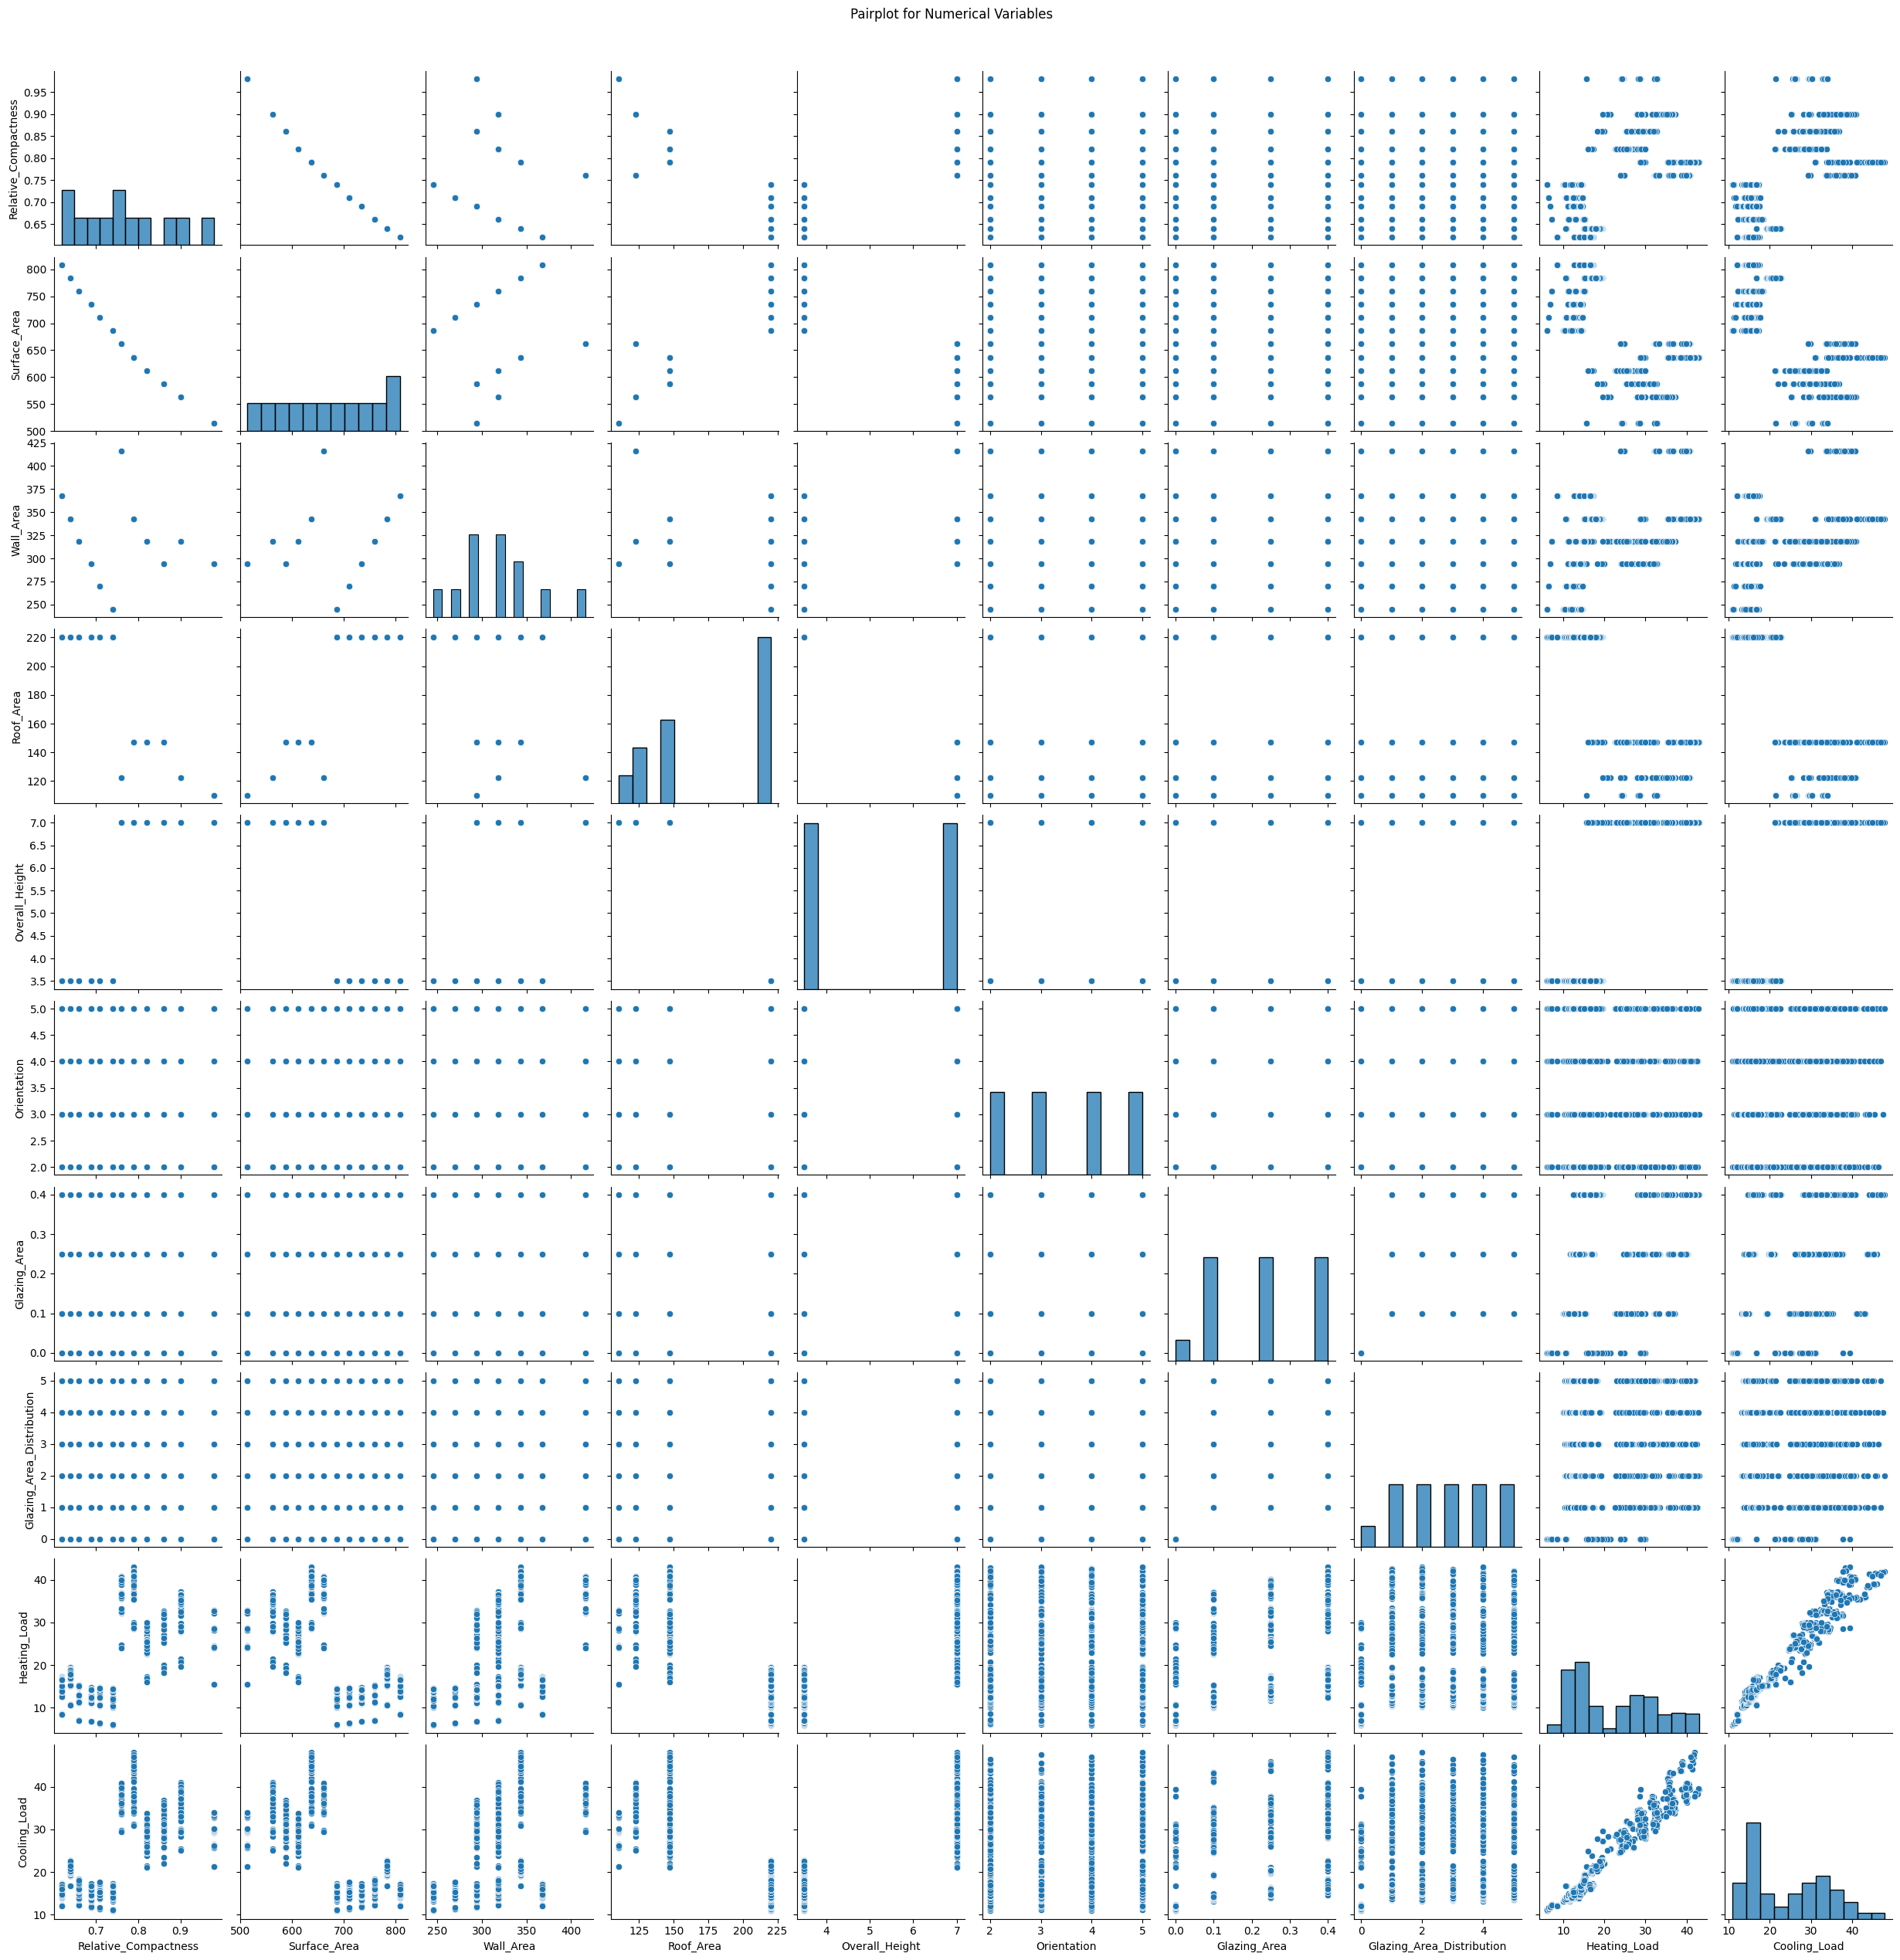

In [10]:
sns.pairplot(df)
plt.suptitle("Pairplot for Numerical Variables", y=1.02)
plt.show()

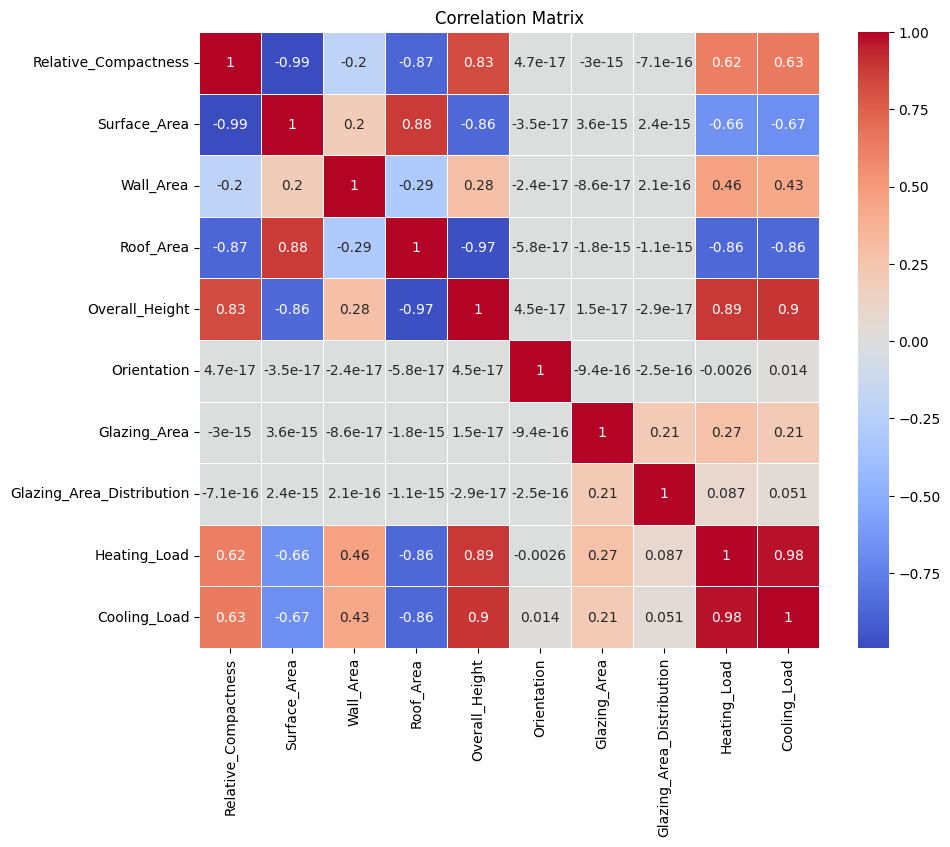

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Distribution of Heating Load')

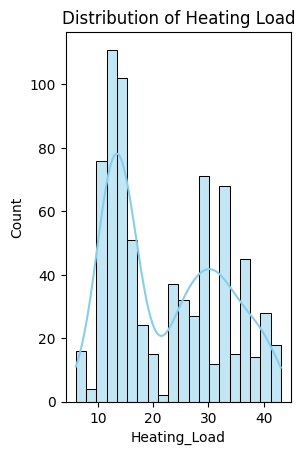

In [12]:
plt.subplot(1, 2, 1)
sns.histplot(df["Heating_Load"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Heating Load")

Text(0.5, 1.0, 'Distribution of Cooling Load')

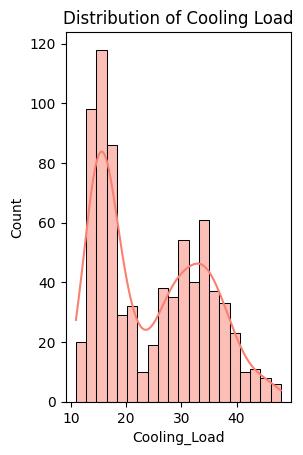

In [13]:
plt.subplot(1, 2, 2)
sns.histplot(df["Cooling_Load"], bins=20, kde=True, color="salmon")
plt.title("Distribution of Cooling Load")

In [14]:
import plotly.express as px

# Assuming df is your DataFrame with the dataset

# Scatter Plot Matrix
fig = px.scatter_matrix(
    df,
    dimensions=["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height"],
    color="Heating_Load",
    labels={"Heating_Load": "Heating Load"},
    title="Scatter Plot Matrix",
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=900, height=900)
fig.show()

# 3D Scatter Plot
fig_3d = px.scatter_3d(
    df,
    x="Relative_Compactness",
    y="Surface_Area",
    z="Heating_Load",
    color="Cooling_Load",
    size_max=10,
    title="3D Scatter Plot",
)
fig_3d.show()

In [15]:
import plotly.graph_objects as go

# Scatter Plot Matrix with Histograms
scatter_matrix = px.scatter_matrix(
    df,
    dimensions=["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height"],
    color="Heating_Load",
    labels={"Heating_Load": "Heating Load"},
    title="Scatter Plot Matrix with Histograms",
)
scatter_matrix.update_traces(marker=dict(size=5))
scatter_matrix.update_layout(width=900, height=900)
scatter_matrix.show()

# Heatmap for Correlation Matrix
correlation_matrix = df.corr()
heatmap = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                    x=correlation_matrix.index,
                                    y=correlation_matrix.columns,
                                    colorscale="Viridis"))
heatmap.update_layout(title="Correlation Matrix Heatmap")
heatmap.show()

# Bar Chart for Average Heating Load and Cooling Load by Orientation
average_loads_by_orientation = df.groupby("Orientation")[["Heating_Load", "Cooling_Load"]].mean().reset_index()

bar_chart_orientation = px.bar(
    average_loads_by_orientation,
    x="Orientation",
    y=["Heating_Load", "Cooling_Load"],
    title="Average Heating Load and Cooling Load by Orientation",
    labels={"value": "Load", "variable": "Load Type"},
    barmode="group",
)
bar_chart_orientation.show()

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

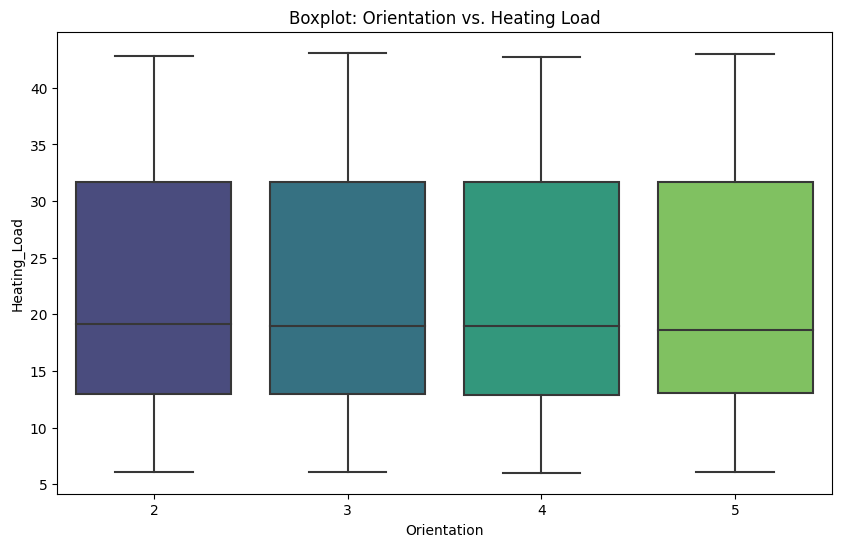

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Orientation", y="Heating_Load", data=df, palette="viridis")
plt.title("Boxplot: Orientation vs. Heating Load")
plt.show()

Heating Load - Mean Squared Error: 9.15171647030883
Heating Load - R^2 Score: 0.9121982116568189

Cooling Load - Mean Squared Error: 9.896048105943512
Cooling Load - R^2 Score: 0.8931972456590836


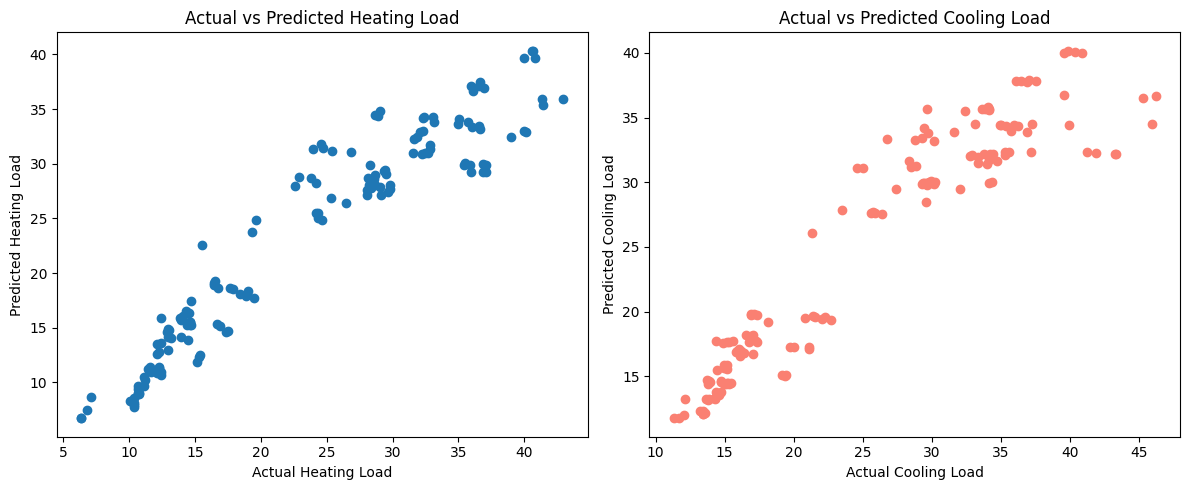

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the dataset

# Separate features (X) and target variables (y)
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y = df[["Heating_Load", "Cooling_Load"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output regression model with Linear Regression as the base estimator
model = MultiOutputRegressor(LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model for Heating_Load
mse_heating = mean_squared_error(y_test["Heating_Load"], y_pred[:, 0])
r2_heating = r2_score(y_test["Heating_Load"], y_pred[:, 0])

# Evaluate the model for Cooling_Load
mse_cooling = mean_squared_error(y_test["Cooling_Load"], y_pred[:, 1])
r2_cooling = r2_score(y_test["Cooling_Load"], y_pred[:, 1])

print("Heating Load - Mean Squared Error:", mse_heating)
print("Heating Load - R^2 Score:", r2_heating)
print("\nCooling Load - Mean Squared Error:", mse_cooling)
print("Cooling Load - R^2 Score:", r2_cooling)

# Plotting actual vs predicted values for Heating Load
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test["Heating_Load"], y_pred[:, 0])
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")

# Plotting actual vs predicted values for Cooling Load
plt.subplot(1, 2, 2)
plt.scatter(y_test["Cooling_Load"], y_pred[:, 1], color='salmon')
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs Predicted Cooling Load")

plt.tight_layout()
plt.show()


Linear Regression:
Best Hyperparameters: {}
Cross-Validation Mean MSE: -9.532020520513969
Heating Load - Mean Squared Error: 9.390916554792998
Heating Load - R^2 Score: 0.9099033202823223
Cooling Load - Mean Squared Error: 10.245765166707375
Cooling Load - R^2 Score: 0.8894229364671995


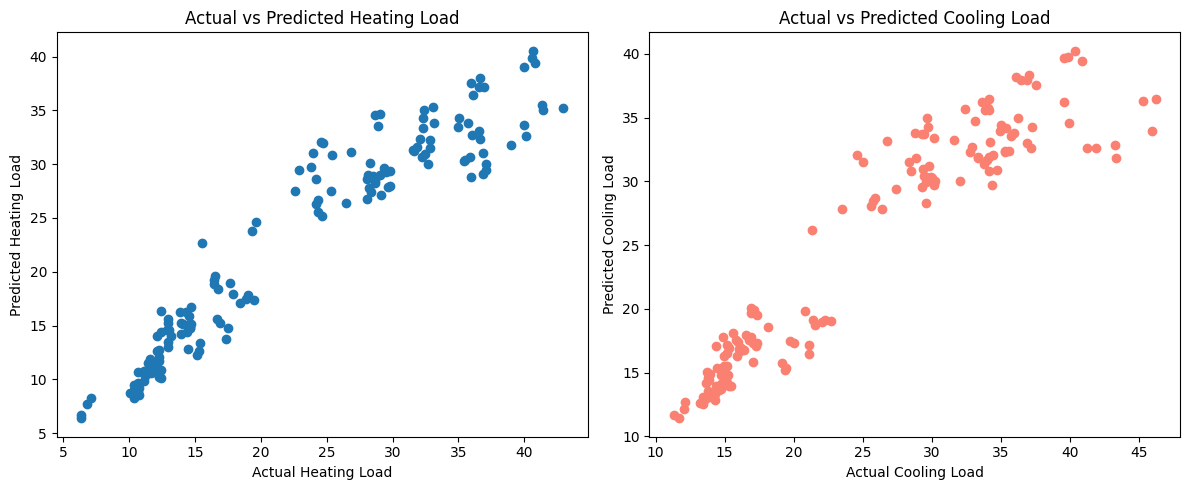


Decision Tree:
Best Hyperparameters: {'estimator__max_depth': 7}
Cross-Validation Mean MSE: -1.9934738066267905
Heating Load - Mean Squared Error: 0.3194336648665959
Heating Load - R^2 Score: 0.9969353457219422
Cooling Load - Mean Squared Error: 3.9468610279617997
Cooling Load - R^2 Score: 0.9574036398899508


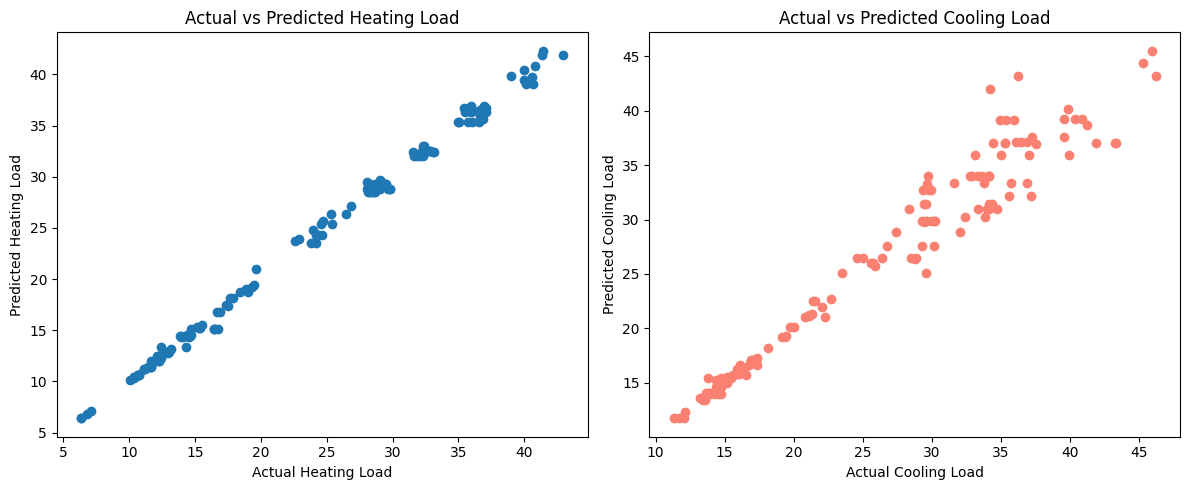


Random Forest:
Best Hyperparameters: {'estimator__max_depth': 7, 'estimator__n_estimators': 150}
Cross-Validation Mean MSE: -1.591709378521269
Heating Load - Mean Squared Error: 0.253864576620091
Heating Load - R^2 Score: 0.9975644171345841
Cooling Load - Mean Squared Error: 3.25139745804833
Cooling Load - R^2 Score: 0.964909406233782


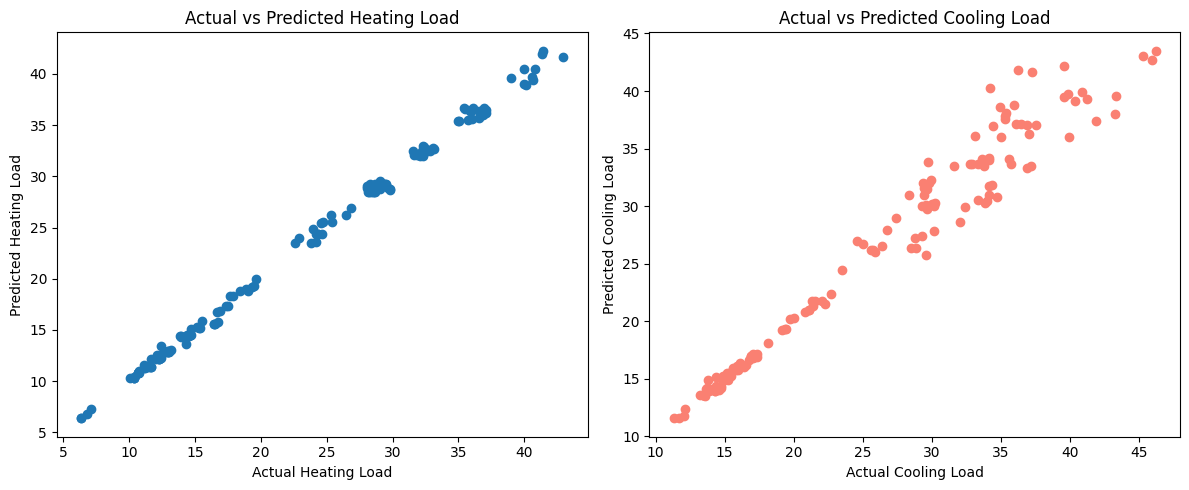


Support Vector Regressor:
Best Hyperparameters: {'estimator__C': 10, 'estimator__kernel': 'rbf'}
Cross-Validation Mean MSE: -7.061041136960983
Heating Load - Mean Squared Error: 5.098168882180411
Heating Load - R^2 Score: 0.9510880448948293
Cooling Load - Mean Squared Error: 7.257004442413955
Cooling Load - R^2 Score: 0.9216790324363344


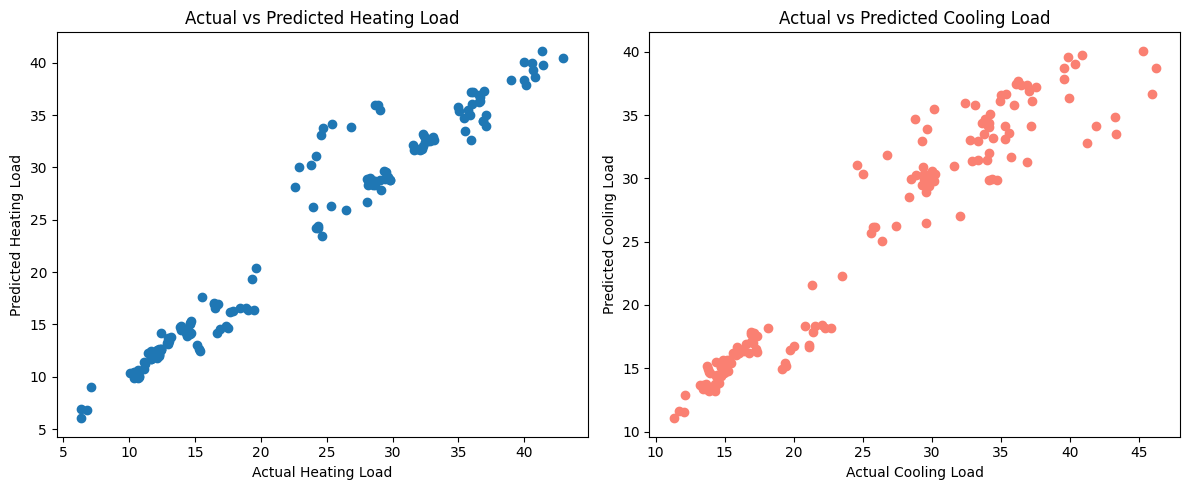

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the dataset

# Separate features (X) and target variables (y)
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y = df[["Heating_Load", "Cooling_Load"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a multi-output regression model with different algorithms
models = {
    "Linear Regression": MultiOutputRegressor(LinearRegression()),
    "Decision Tree": MultiOutputRegressor(DecisionTreeRegressor(random_state=42)),
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "Support Vector Regressor": MultiOutputRegressor(SVR()),
}

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "Linear Regression": {},
    "Decision Tree": {"estimator__max_depth": [3, 5, 7]},
    "Random Forest": {"estimator__n_estimators": [50, 100, 150], "estimator__max_depth": [3, 5, 7]},
    "Support Vector Regressor": {"estimator__C": [0.1, 1, 10], "estimator__kernel": ["linear", "rbf"]}
}

for model_name, model in models.items():
    print(f"\n{model_name}:")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

    # Cross-validation
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation Mean MSE: {cv_scores.mean()}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Evaluate the model for Heating_Load
    mse_heating = mean_squared_error(y_test["Heating_Load"], y_pred[:, 0])
    r2_heating = r2_score(y_test["Heating_Load"], y_pred[:, 0])

    # Evaluate the model for Cooling_Load
    mse_cooling = mean_squared_error(y_test["Cooling_Load"], y_pred[:, 1])
    r2_cooling = r2_score(y_test["Cooling_Load"], y_pred[:, 1])

    print(f"Heating Load - Mean Squared Error: {mse_heating}")
    print(f"Heating Load - R^2 Score: {r2_heating}")
    print(f"Cooling Load - Mean Squared Error: {mse_cooling}")
    print(f"Cooling Load - R^2 Score: {r2_cooling}")

    # Plotting actual vs predicted values for Heating Load
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test["Heating_Load"], y_pred[:, 0])
    plt.xlabel("Actual Heating Load")
    plt.ylabel("Predicted Heating Load")
    plt.title("Actual vs Predicted Heating Load")

    # Plotting actual vs predicted values for Cooling Load
    plt.subplot(1, 2, 2)
    plt.scatter(y_test["Cooling_Load"], y_pred[:, 1], color='salmon')
    plt.xlabel("Actual Cooling Load")
    plt.ylabel("Predicted Cooling Load")
    plt.title("Actual vs Predicted Cooling Load")

    plt.tight_layout()
    plt.show()

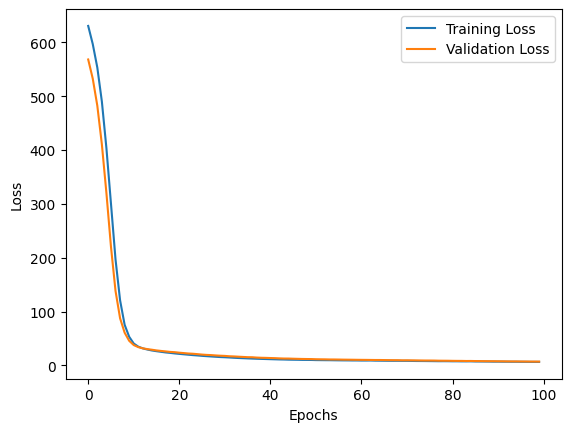

5/5 [==============================] - 0s 3ms/step
Heating Load - Mean Squared Error: 6.043945965459797
Heating Load - R^2 Score: 0.9420142367676502
Cooling Load - Mean Squared Error: 6.946565531578761
Cooling Load - R^2 Score: 0.9250294335638188


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Build the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for Heating_Load and Cooling_Load

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model for Heating_Load
mse_heating = mean_squared_error(y_test["Heating_Load"], y_pred[:, 0])
r2_heating = r2_score(y_test["Heating_Load"], y_pred[:, 0])

# Evaluate the model for Cooling_Load
mse_cooling = mean_squared_error(y_test["Cooling_Load"], y_pred[:, 1])
r2_cooling = r2_score(y_test["Cooling_Load"], y_pred[:, 1])

print(f"Heating Load - Mean Squared Error: {mse_heating}")
print(f"Heating Load - R^2 Score: {r2_heating}")
print(f"Cooling Load - Mean Squared Error: {mse_cooling}")
print(f"Cooling Load - R^2 Score: {r2_cooling}")

In [21]:
# Create new input data for testing
new_input = np.array([[0.95, 550, 300, 100, 6.5, 3, 0.1, 2]])

# Standardize the new input using the same scaler
new_input_scaled = scaler.transform(new_input)

# Make predictions on the new input
new_output = model.predict(new_input_scaled)

# Print the predicted output
print("Predicted Heating Load:", new_output[0, 0])
print("Predicted Cooling Load:", new_output[0, 1])

1/1 [==============================] - 0s 26ms/step
Predicted Heating Load: 21.17054
Predicted Cooling Load: 23.816666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

